In [1]:
from modelo_tweets import *

In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

In [2]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')
masas=pd.read_csv('entradas/masas.csv')
masas.fecha=pd.to_datetime(masas.fecha)

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([        
#                      t.weekday()/6.0,
                     (t.hour > 12)*1,
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),   
                     np.nan_to_num(masas[masas.fecha == pd.Timestamp(t.date())].CreatedAt.mean()),
                     1
                    ])

In [3]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
train_period=('2019-05-01 00:00','2019-05-15 00:00')
validate_period=('2019-05-15 00:00','2019-06-01 00:00')
model=modelTweets(data,
                  train_period,
                  validate_period,
                  f_covariates=(TC,restore_date),
                  followers_rate=1,
                  win_size_pred_period=1
                 )

In [5]:
model.train()

3.6064359397164384e-10
[14.          6.          6.          0.          4.          9.33333333
 28.        ]
3.6064359397164384e-10


(array([-0.51242748,  0.19731981,  0.32878865,  0.        , -0.67654992,
         0.68723572,  1.78629855]),
 array([ 1.54420386e-02, -9.21879903e+01,  2.74548977e+00]),
 0.11812796144974476,
 array([ 59.88288973,  32.85029791, 119.75874864,  30.60522723,
         13.67395849,  20.03841798,  17.55822665,   7.60019922,
         17.80788377,  16.40376796,  33.56290286,  32.11752306,
         12.41079699,   6.07369424,   3.78565947,   5.32951278,
          3.0220706 ,   2.78071516,   2.68184563,   2.63083954,
         21.38238534,   5.48447362,  16.2487028 ,  38.91421295,
         31.27680265,  17.23530416,  14.7506008 ,  68.22786323,
        181.62125868,  46.39337062,  19.78137537,  46.75456561,
         12.87833204,  93.09639134,  71.06704118,  28.11683094,
         22.95445415,  50.43272822,  31.32355374,   9.18562114,
          7.53877017,   6.25053081,   5.43908757,   5.18771826,
          5.26657472,  14.79710329,  25.31745536,  37.42732667,
         35.57965812,  38.43756249,  20.

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start'>

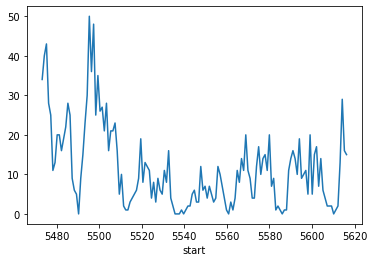

In [77]:
sns.lineplot(model.real_tweets_train.start,count_tweets(np.array([ model.Tweets[i]['times'][0] for i in model.keys_train_in ]),model.t_train))

In [56]:
A,B=model.compute_lambda_predict()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

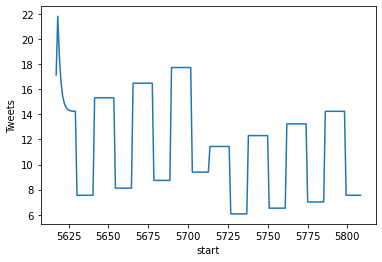

In [57]:
sns.lineplot(B.start,B.Tweets)

In [58]:
model.Tweets_pred

,start,end,Tweets
0,5617.223333,5618.228569,17.146236
1,5618.228569,5619.233805,21.829004
2,5619.233805,5620.239040,18.625543
3,5620.239040,5621.244276,16.585503
4,5621.244276,5622.249511,15.514477
...,...,...,...
186,5804.197155,5805.202391,7.550248
187,5805.202391,5806.207627,7.550248
188,5806.207627,5807.212862,7.550248
189,5807.212862,5808.218098,7.550248


In [42]:
model.compute_errors()

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:644: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


({'APE': array([5.45766557e-01, 1.24016328e+00, 2.22221707e+00, 2.90971386e+00,
         2.04050949e+00, 2.01707942e+00, 1.57698828e+00, 1.68503576e+00,
         4.28977895e+00, 2.07954119e+00, 2.59230798e+00, 1.75547024e+00,
         2.03399506e+00, 4.69140004e+00, 1.12915396e+01, 1.50312501e+01,
         2.58824437e+01, 1.43056860e+01, 4.09409374e+01, 6.70048071e+00,
         3.16835092e+00, 1.11066574e+00, 5.63856698e-01, 2.36510815e-01,
         1.71727741e+00, 1.53612343e+00, 2.93417236e+00, 2.64284076e+00,
         6.56527834e+00, 2.46446584e+00, 6.67177258e+00, 7.26108401e+00,
         1.45921206e-02, 7.06249933e-02, 1.82496998e-01, 4.45679474e-01,
         1.02312668e+00, 2.36239836e+00, 1.90159887e+00, 2.31169862e+01,
         1.29164424e+01, 9.54211764e+00, 3.79975472e+01, 6.38631935e+00,
         2.29017387e-01, 7.14691570e-02, 1.38115455e-01, 1.78632255e-01,
         4.24599922e-01, 6.80194533e-01, 2.27978382e+00, 4.68873892e+00,
         3.93904692e+00, 3.27268077e+00, 4.5

In [43]:
model.errors_predict['MAPE']
model.errors_predict['Pearson']
model.errors_predict_cum['MAPE']
model.errors_predict_cum['Pearson']

0.9895624069710519

In [44]:
sns.lineplot(B.start,model.errors_predict['APE'])
model.errors_predict['APE'].mean()

NameError: name 'B' is not defined

In [62]:
model.method_pred = 'thinning'

In [63]:
C,D=model.compute_lambda_predict()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

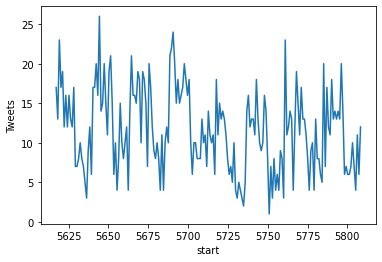

In [64]:
sns.lineplot(D.start,D.Tweets)

In [65]:
model.compute_errors()

({'APE': array([ 0.37037037,  0.69047619,  0.11538462,  0.05555556,  0.05      ,
          0.14285714,  0.77464789,  0.83333333,  0.81395349,  0.83950617,
          0.85882353,  0.75      ,  0.76666667,  0.84090909,  0.46666667,
          2.33333333,  7.        ,  0.4       ,  0.16666667,  0.86956522,
          0.8       ,  0.84210526,  0.86956522,  0.58536585,  0.34615385,
          0.42857143,  0.44827586,  0.16129032,  0.3       ,  0.54545455,
          0.04761905,  0.11764706,  0.35294118,  0.05      ,  0.22222222,
          0.48275862,  0.66666667,  0.47368421,  0.33333333,  3.        ,
         14.        ,  2.33333333,  1.66666667,  0.25      ,  0.53846154,
          0.90697674,  0.65      ,  0.41666667,  0.30434783,  0.62790698,
          0.65116279,  0.47222222,  0.37931034,  0.66666667,  0.75324675,
          0.66037736,  0.74576271,  0.87931034,  0.58333333,  0.55263158,
          0.72093023,  0.55      ,  1.        ,  0.28571429,  0.33333333,
          1.        ,  0.222222

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.5860534308762633

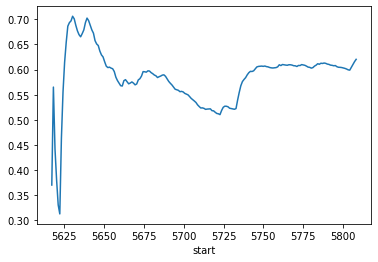

In [66]:
sns.lineplot(B.start,model.errors_predict_cum['APE'])
model.errors_predict_cum['APE'].mean()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Time (Hours)')]

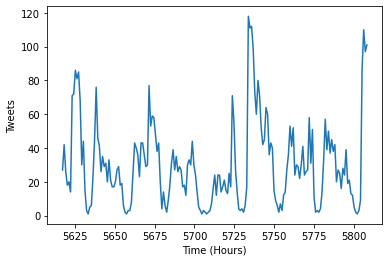

In [67]:
ax=sns.lineplot(model.real_tweets_validate.start,model.real_tweets_validate.Tweets)
ax.set(xlabel='Time (Hours)')
# plt.savefig("results/figures/ej_timeline.pdf")

In [68]:
D

,start,end,Tweets
0,5617.223333,5618.228569,17
1,5618.228569,5619.233805,13
2,5619.233805,5620.239040,23
3,5620.239040,5621.244276,17
4,5621.244276,5622.249511,19
...,...,...,...
186,5804.197155,5805.202391,7
187,5805.202391,5806.207627,4
188,5806.207627,5807.212862,11
189,5807.212862,5808.218098,6
